In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer



In [2]:
df = pd.read_csv('pre_training.csv')

In [3]:
X = df.drop(columns=["Health_Issues"])
y = df["Health_Issues"]
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)



In [4]:
from sklearn.utils.class_weight import compute_class_weight

# --- calcul des poids de classe à partir de y_train ---
classes = np.unique(y_train)
cw_values = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, cw_values))
print("Class weights dict:", class_weight_dict)


Class weights dict: {np.int64(1): np.float64(0.42080457835381246), np.int64(2): np.float64(0.6985191394244202), np.int64(3): np.float64(5.399568034557236), np.int64(4): np.float64(147.05882352941177)}


In [5]:
print("Régression Logistique")

model = LogisticRegression(max_iter=1000, class_weight=class_weight_dict, random_state=42)
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])
model.fit(X_train_full, y_train_full)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

y_proba = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_proba))

Régression Logistique
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      1188
           2       0.86      0.72      0.78       716
           3       0.34      0.66      0.45        93
           4       0.19      1.00      0.32         3

    accuracy                           0.85      2000
   macro avg       0.58      0.83      0.62      2000
weighted avg       0.88      0.85      0.86      2000

Log Loss: 0.3453757451291245


In [6]:
print("Régression Logistique")

model = LogisticRegression(max_iter=1000,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

y_proba = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, y_proba))

Régression Logistique
              precision    recall  f1-score   support

           1       0.92      0.96      0.94      1188
           2       0.86      0.84      0.85       716
           3       0.63      0.44      0.52        93
           4       0.00      0.00      0.00         3

    accuracy                           0.89      2000
   macro avg       0.60      0.56      0.58      2000
weighted avg       0.89      0.89      0.89      2000

Log Loss: 0.2587132871150937


/home/leferre/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/leferre/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/leferre/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


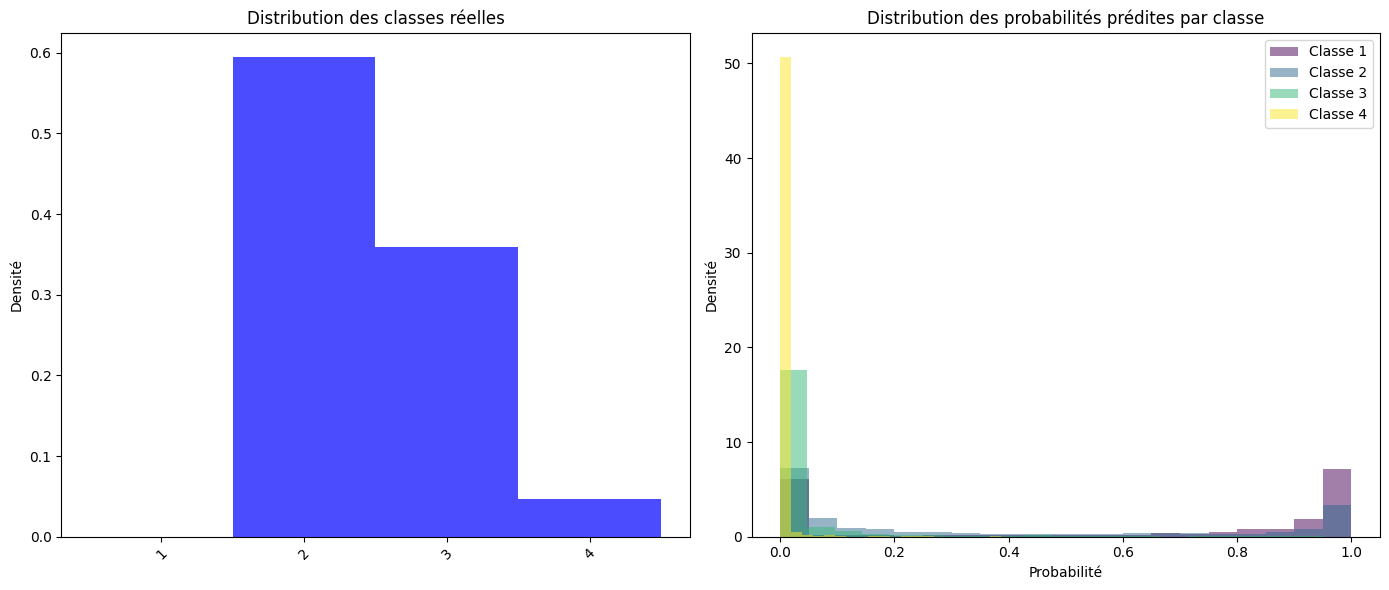

Probabilités moyennes prédites pour chaque classe réelle:
  Classe réelle 2 → Probabilité moyenne pour classe 1: 0.9080
  Classe réelle 2 → Probabilité moyenne pour classe 2: 0.0905
  Classe réelle 2 → Probabilité moyenne pour classe 3: 0.0015
  Classe réelle 2 → Probabilité moyenne pour classe 4: 0.0000

  Classe réelle 3 → Probabilité moyenne pour classe 1: 0.1399
  Classe réelle 3 → Probabilité moyenne pour classe 2: 0.7887
  Classe réelle 3 → Probabilité moyenne pour classe 3: 0.0695
  Classe réelle 3 → Probabilité moyenne pour classe 4: 0.0019

  Classe réelle 4 → Probabilité moyenne pour classe 1: 0.0077
  Classe réelle 4 → Probabilité moyenne pour classe 2: 0.5258
  Classe réelle 4 → Probabilité moyenne pour classe 3: 0.4402
  Classe réelle 4 → Probabilité moyenne pour classe 4: 0.0262

Log loss (Logistic Regression): 0.2587132871150937


In [7]:
import numpy as np

# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Convertir les classes en numérique si ce n'est pas déjà le cas
y_test_numeric = y_test
class_names = model.classes_

# Histogramme des valeurs réelles
ax1.hist(y_test_numeric, bins=len(class_names), alpha=0.7, color='blue', 
         range=(-0.5, len(class_names)-0.5), density=True)
ax1.set_title('Distribution des classes réelles')
ax1.set_xticks(range(len(class_names)))
ax1.set_xticklabels(class_names, rotation=45)
ax1.set_ylabel('Densité')

# Histogramme des probabilités prédites pour chaque classe
colors = plt.cm.viridis(np.linspace(0, 1, len(class_names)))
for i, class_name in enumerate(class_names):
    class_probs = y_proba[:, i]
    ax2.hist(class_probs, bins=20, alpha=0.5, label=f'Classe {class_name}', 
             color=colors[i], density=True)

ax2.set_title('Distribution des probabilités prédites par classe')
ax2.set_xlabel('Probabilité')
ax2.set_ylabel('Densité')
ax2.legend()

plt.tight_layout()
plt.show()

# Afficher la distribution moyenne des probabilités pour chaque classe réelle
print("Probabilités moyennes prédites pour chaque classe réelle:")
for i, class_name in enumerate(class_names):
    mask = (y_test_numeric == i)
    if mask.any():
        mean_probs = y_proba[mask].mean(axis=0)
        for j, prob in enumerate(mean_probs):
            print(f"  Classe réelle {class_name} → Probabilité moyenne pour classe {class_names[j]}: {prob:.4f}")
        print()
        
# Calculer la perte Categorical Cross-Entropy
cce_loss = log_loss(y_test, y_proba)
print("Log loss (Logistic Regression):", cce_loss)

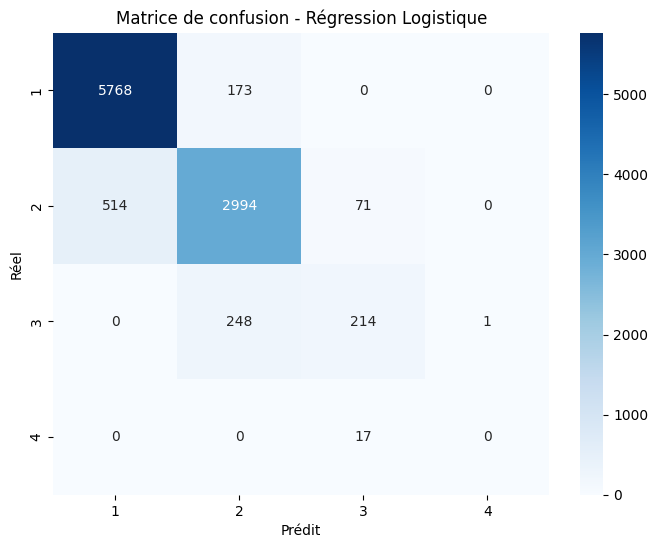

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_p = model.predict(X)

# Matrice de confusion pour le modèle Bayesien naïf
cm = confusion_matrix(y, y_p, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion - Régression Logistique')
plt.show()

In [9]:
y_weighted = [class_weight_dict[label]*label for label in y]

=== K-Nearest Neighbors (KNN) ===
Validation croisée StratifiedKFold pour KNN
------------------------------------------------------------
k= 3 | Log Loss: 2.4094 ± 0.2750 | Accuracy: 0.8402 ± 0.0079
k= 5 | Log Loss: 1.6148 ± 0.2106 | Accuracy: 0.8414 ± 0.0070
k= 7 | Log Loss: 1.2205 ± 0.1593 | Accuracy: 0.8366 ± 0.0061
k=10 | Log Loss: 0.8448 ± 0.0716 | Accuracy: 0.8239 ± 0.0051
k=15 | Log Loss: 0.6653 ± 0.0334 | Accuracy: 0.8252 ± 0.0083
k=20 | Log Loss: 0.5711 ± 0.0313 | Accuracy: 0.8192 ± 0.0065
k=25 | Log Loss: 0.5251 ± 0.0421 | Accuracy: 0.8184 ± 0.0056
k=30 | Log Loss: 0.5082 ± 0.0271 | Accuracy: 0.8123 ± 0.0076
k=35 | Log Loss: 0.5001 ± 0.0217 | Accuracy: 0.8081 ± 0.0079
k=40 | Log Loss: 0.5021 ± 0.0209 | Accuracy: 0.8047 ± 0.0077
k=45 | Log Loss: 0.4992 ± 0.0168 | Accuracy: 0.8014 ± 0.0062
k=50 | Log Loss: 0.5000 ± 0.0234 | Accuracy: 0.7959 ± 0.0077

Meilleur k selon CV: 45
Log Loss: 0.4992 ± 0.0168
Accuracy: 0.8014 ± 0.0062

=== Résultats sur l'ensemble de test ===
KNN (k=45)

/home/leferre/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/leferre/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/leferre/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


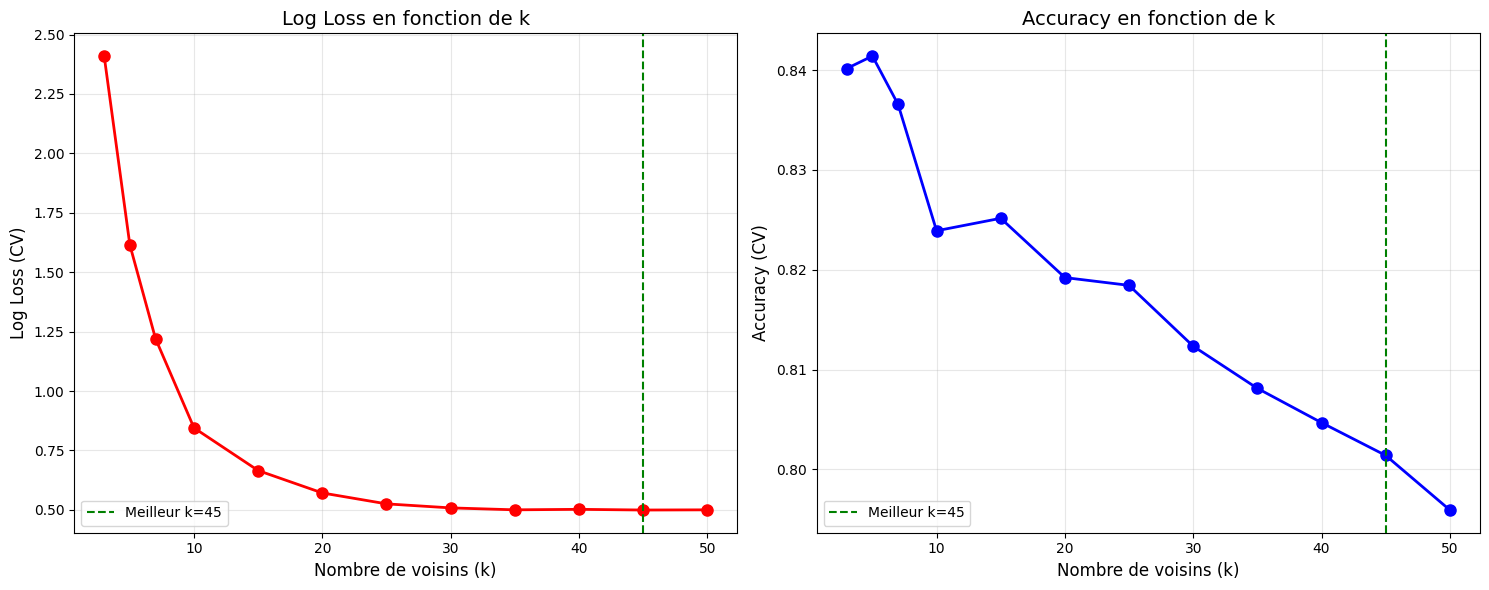

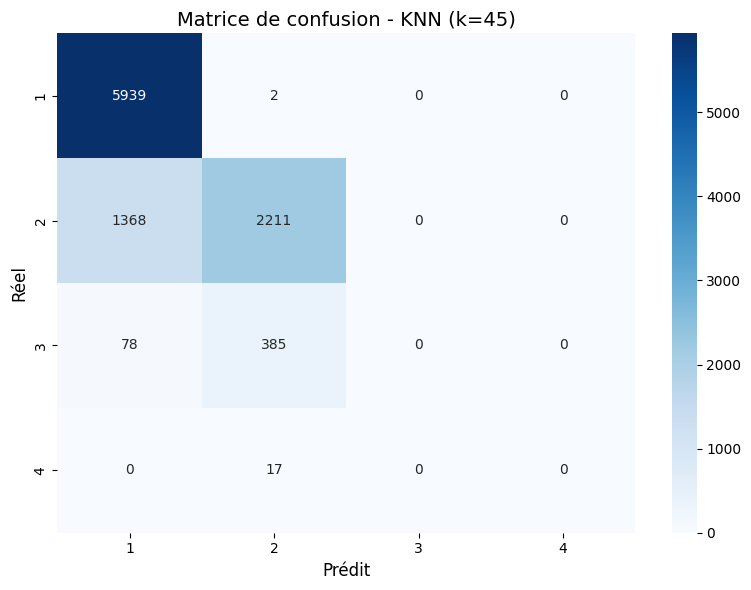

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

print("=== K-Nearest Neighbors (KNN) ===")

# Paramètres à tester
k_values = [3, 5, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50]
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Stocker les résultats de la validation croisée
cv_results = []

print("Validation croisée StratifiedKFold pour KNN")
print("-" * 60)

for k in k_values:
    fold_losses = []
    fold_accuracies = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Créer et entraîner le modèle KNN
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
        knn.fit(X_tr, y_tr)

        # Prédictions probabilistes et métriques
        y_val_proba = knn.predict_proba(X_val)
        y_val_pred = knn.predict(X_val)
        
        fold_losses.append(log_loss(y_val, y_val_proba))
        fold_accuracies.append(accuracy_score(y_val, y_val_pred))

    mean_loss = float(np.mean(fold_losses))
    std_loss = float(np.std(fold_losses))
    mean_acc = float(np.mean(fold_accuracies))
    std_acc = float(np.std(fold_accuracies))
    
    cv_results.append({
        'k': k, 
        'mean_log_loss': mean_loss, 
        'std_log_loss': std_loss,
        'mean_accuracy': mean_acc,
        'std_accuracy': std_acc
    })
    
    print(f"k={k:2d} | Log Loss: {mean_loss:.4f} ± {std_loss:.4f} | Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")

# Choisir le meilleur k (plus faible log-loss)
best = min(cv_results, key=lambda r: r['mean_log_loss'])
best_k = best['k']
print(f"\n{'='*60}")
print(f"Meilleur k selon CV: {best_k}")
print(f"Log Loss: {best['mean_log_loss']:.4f} ± {best['std_log_loss']:.4f}")
print(f"Accuracy: {best['mean_accuracy']:.4f} ± {best['std_accuracy']:.4f}")
print(f"{'='*60}")

# Entraîner le modèle final avec le meilleur k sur tout X_train
knn_final = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', metric='euclidean')
knn_final.fit(X_train, y_train)

# Évaluation sur l'ensemble de test
y_test_proba = knn_final.predict_proba(X_test)
y_test_pred = knn_final.predict(X_test)
test_logloss = log_loss(y_test, y_test_proba)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n=== Résultats sur l'ensemble de test ===")
print(f"KNN (k={best_k})")
print(f"Log Loss: {test_logloss:.4f}")
print(f"Accuracy: {test_accuracy:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_test_pred))

# Visualisation des résultats de la validation croisée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

k_vals = [r['k'] for r in cv_results]
losses = [r['mean_log_loss'] for r in cv_results]
accs = [r['mean_accuracy'] for r in cv_results]

# Graphique Log Loss vs k
ax1.plot(k_vals, losses, 'o-', linewidth=2, markersize=8, color='red')
ax1.axvline(x=best_k, color='green', linestyle='--', label=f'Meilleur k={best_k}')
ax1.set_xlabel('Nombre de voisins (k)', fontsize=12)
ax1.set_ylabel('Log Loss (CV)', fontsize=12)
ax1.set_title('Log Loss en fonction de k', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Graphique Accuracy vs k
ax2.plot(k_vals, accs, 'o-', linewidth=2, markersize=8, color='blue')
ax2.axvline(x=best_k, color='green', linestyle='--', label=f'Meilleur k={best_k}')
ax2.set_xlabel('Nombre de voisins (k)', fontsize=12)
ax2.set_ylabel('Accuracy (CV)', fontsize=12)
ax2.set_title('Accuracy en fonction de k', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Matrice de confusion sur l'ensemble complet pour visualisation globale
y_full_pred = knn_final.predict(X)
cm = confusion_matrix(y, y_full_pred, labels=knn_final.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn_final.classes_, yticklabels=knn_final.classes_)
plt.xlabel('Prédit', fontsize=12)
plt.ylabel('Réel', fontsize=12)
plt.title(f'Matrice de confusion - KNN (k={best_k})', fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
#modele SVM non lineaire

In [12]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

print("=== Support Vector Machine (SVM) Non-linéaire ===")

# Tester différents noyaux non-linéaires
kernels = ['rbf', 'poly', 'sigmoid']
C_values = [float(i) for i in np.linspace(0.1,10,10)]
svm_results = []

print("Test de différents noyaux et paramètres C:")
print("-" * 60)

for kernel in kernels:
    for C in C_values:
        # Paramètres spécifiques selon le noyau
        if kernel == 'poly':
            svm_model = SVC(kernel=kernel, C=C, degree=3, probability=True, random_state=42,class_weight='balanced',decision_function_shape='ovo')
        elif kernel == 'rbf':
            svm_model = SVC(kernel=kernel, C=C, gamma='scale', probability=True, random_state=42,class_weight='balanced',decision_function_shape='ovo')
        else:  # sigmoid
            svm_model = SVC(kernel=kernel, C=C, gamma='scale', probability=True, random_state=42,class_weight='balanced',decision_function_shape='ovo')
        for train_idx, val_idx in skf.split(X_train, y_train):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # Entraîner le modèle
            svm_model.fit(X_tr, y_tr)
            scores = cross_val_score(svm_model, X_tr, y_tr, cv=5)

        # Prédictions
            y_svm_val = svm_model.predict(X_val)
            y_svm_val_proba= svm_model.predict_proba(X_val)
        
        # Calculer les métriques
            logloss = log_loss(y_val, y_svm_val_proba)
        
            svm_results.append({
            'kernel': kernel,
            'C': C,
            'log_loss': logloss,
            'model': svm_model,
            'predictions': y_svm_val,
            'probabilities': y_svm_val_proba
        })
        
        print(f"Kernel: {kernel:7} | C: {C:4} | Log Loss: {logloss:.4f}")

# Trouver le meilleur modèle
best_svm_logloss = min(svm_results, key=lambda x: x['log_loss'])

print(f"Meilleur SVM pour la log-loss: {best_svm_logloss['kernel']} (C={best_svm_logloss['C']}) - Log Loss: {best_svm_logloss['log_loss']:.4f}")


=== Support Vector Machine (SVM) Non-linéaire ===
Test de différents noyaux et paramètres C:
------------------------------------------------------------


KeyboardInterrupt: 

In [ ]:
final_model = SVC(kernel = 'rbf',C = 10)
final_model.fit(X_train,y_train)

svm_pred = final_model.predict(X_test)
loss = log_loss(y_test,svm_pred)

ValueError: y_true and y_pred contain different number of classes 4, 2. Please provide the true labels explicitly through the labels argument. Classes found in y_true: [1 2 3 4]

/tmp/ipykernel_54898/1612175362.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


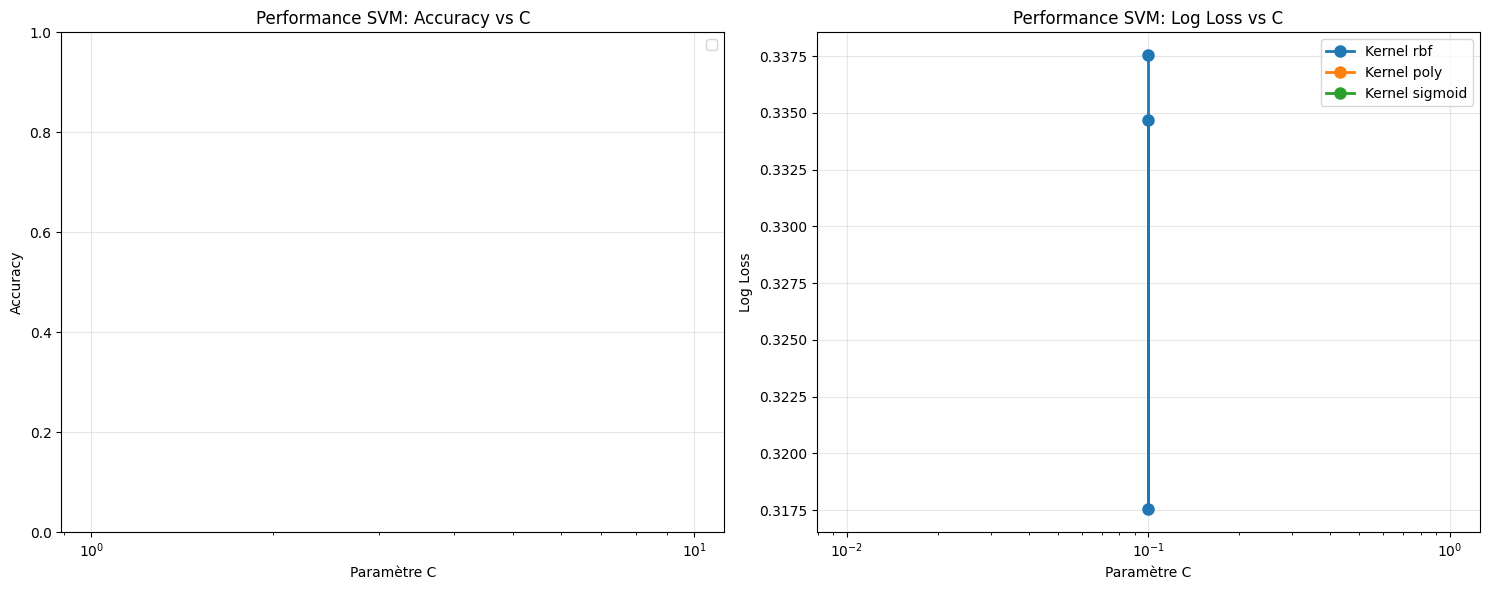

NameError: name 'best_svm_logloss' is not defined

In [13]:
# Visualisation des performances par noyau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Grouper les résultats par noyau
for kernel in kernels:
    kernel_results = [r for r in svm_results if r['kernel'] == kernel]
    c_vals = [r['C'] for r in kernel_results]
    losses = [r['log_loss'] for r in kernel_results]
    
    ax2.plot(c_vals, losses, 'o-', label=f'Kernel {kernel}', linewidth=2, markersize=8)

ax1.set_xscale('log')
ax1.set_xlabel('Paramètre C')
ax1.set_ylabel('Accuracy')
ax1.set_title('Performance SVM: Accuracy vs C')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.set_xscale('log')
ax2.set_xlabel('Paramètre C')
ax2.set_ylabel('Log Loss')
ax2.set_title('Performance SVM: Log Loss vs C')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Classification report pour le meilleur modèle
best_svm_model = best_svm_logloss['model']
best_svm_pred = best_svm_logloss['predictions']

print(f"\n=== Classification Report (SVM {best_svm_logloss['kernel']}, C={best_svm_logloss['C']}) ===")
print(classification_report(y_test, best_svm_pred))

# Matrice de confusion pour le meilleur modèle
cm_svm = confusion_matrix(y_test, best_svm_pred, labels=best_svm_model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title(f'Matrice de confusion - SVM {best_svm_logloss["kernel"]} (C={best_svm_logloss["C"]})')
plt.show()

Recherche manuelle par StratifiedKFold (validation interne sur X_train)
n=100 md=None leaf=1 → val logloss=0.0379 ± 0.0014
n=100 md=None leaf=2 → val logloss=0.0433 ± 0.0010
n=100 md=10   leaf=1 → val logloss=0.0600 ± 0.0023
n=100 md=10   leaf=2 → val logloss=0.0636 ± 0.0014
n=100 md=20   leaf=1 → val logloss=0.0379 ± 0.0015
n=100 md=20   leaf=2 → val logloss=0.0432 ± 0.0010
n=200 md=None leaf=1 → val logloss=0.0395 ± 0.0012
n=200 md=None leaf=2 → val logloss=0.0454 ± 0.0012
n=200 md=10   leaf=1 → val logloss=0.0646 ± 0.0020
n=200 md=10   leaf=2 → val logloss=0.0683 ± 0.0020
n=200 md=20   leaf=1 → val logloss=0.0393 ± 0.0012
n=200 md=20   leaf=2 → val logloss=0.0454 ± 0.0012

Meilleur hyperparamètres (CV): {'n_estimators': 100, 'max_depth': None, 'min_samples_leaf': 1, 'mean_val_logloss': 0.03789916302170368, 'std_val_logloss': 0.0013922295243135089}

Résultats sur test — Log Loss: 0.0350

Classification report (test):
              precision    recall  f1-score   support

           1

/home/leferre/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/leferre/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/leferre/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


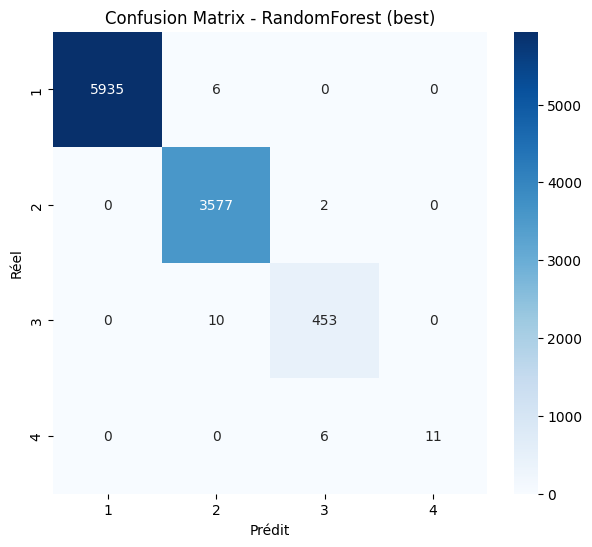

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, classification_report, confusion_matrix
import joblib

# paramètres de recherche (réduire/étendre selon temps)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2]
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results = []
print("Recherche manuelle par StratifiedKFold (validation interne sur X_train)")

for n in param_grid['n_estimators']:
    for md in param_grid['max_depth']:
        for mleaf in param_grid['min_samples_leaf']:
            fold_losses = []
            for train_idx, val_idx in skf.split(X_train, y_train):
                X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
                y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

                rf = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=md,
                    min_samples_leaf=mleaf,
                    class_weight=class_weight_dict,
                    random_state=42,
                    n_jobs=-1
                )
                rf.fit(X_tr, y_tr)
                y_val_proba = rf.predict_proba(X_val)
                fold_losses.append(log_loss(y_val, y_val_proba))
            mean_loss = float(np.mean(fold_losses))
            std_loss = float(np.std(fold_losses))
            results.append({
                'n_estimators': n,
                'max_depth': md,
                'min_samples_leaf': mleaf,
                'mean_val_logloss': mean_loss,
                'std_val_logloss': std_loss
            })
            print(f"n={n:3d} md={str(md):4s} leaf={mleaf} → val logloss={mean_loss:.4f} ± {std_loss:.4f}")

# sélectionner la configuration de meilleur log-loss
best = min(results, key=lambda r: r['mean_val_logloss'])
print("\nMeilleur hyperparamètres (CV):", best)

# réentraîner le modèle avec les meilleurs hyperparamètres sur tout X_train
best_rf = RandomForestClassifier(
    n_estimators=best['n_estimators'],
    max_depth=best['max_depth'],
    min_samples_leaf=best['min_samples_leaf'],
    class_weight=class_weight_dict,
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

# évaluation sur l'ensemble de test indépendant
y_test_proba = best_rf.predict_proba(X_test)
y_test_pred = best_rf.predict(X_test)
test_logloss = log_loss(y_test, y_test_proba)

print(f"\nRésultats sur test — Log Loss: {test_logloss:.4f}")
print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred))

y_pr = best_rf.predict(X)
cm = confusion_matrix(y, y_pr, labels=best_rf.classes_)
import matplotlib.pyplot as plt, seaborn as sns
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.xlabel('Prédit'); plt.ylabel('Réel'); plt.title('Confusion Matrix - RandomForest (best)')
plt.show()

=== Arbre de Décision ===

Validation croisée pour différentes profondeurs d'arbre
------------------------------------------------------------
Profondeur=3    | Log Loss: 0.0231 ± 0.0120 | Accuracy: 0.9977 ± 0.0011
Profondeur=5    | Log Loss: 0.0149 ± 0.0146 | Accuracy: 0.9984 ± 0.0007
Profondeur=7    | Log Loss: 0.0149 ± 0.0146 | Accuracy: 0.9984 ± 0.0007
Profondeur=10   | Log Loss: 0.0149 ± 0.0146 | Accuracy: 0.9984 ± 0.0007
Profondeur=15   | Log Loss: 0.0149 ± 0.0146 | Accuracy: 0.9984 ± 0.0007
Profondeur=20   | Log Loss: 0.0149 ± 0.0146 | Accuracy: 0.9984 ± 0.0007
Profondeur=None | Log Loss: 0.0149 ± 0.0146 | Accuracy: 0.9984 ± 0.0007

Meilleure profondeur selon CV: 5
Log Loss: 0.0149 ± 0.0146
Accuracy: 0.9984 ± 0.0007

=== Résultats sur l'ensemble de test ===
Decision Tree (profondeur=5)
Log Loss: 0.0209
Accuracy: 0.9980

=== Classification Report ===
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1188
           2       1.

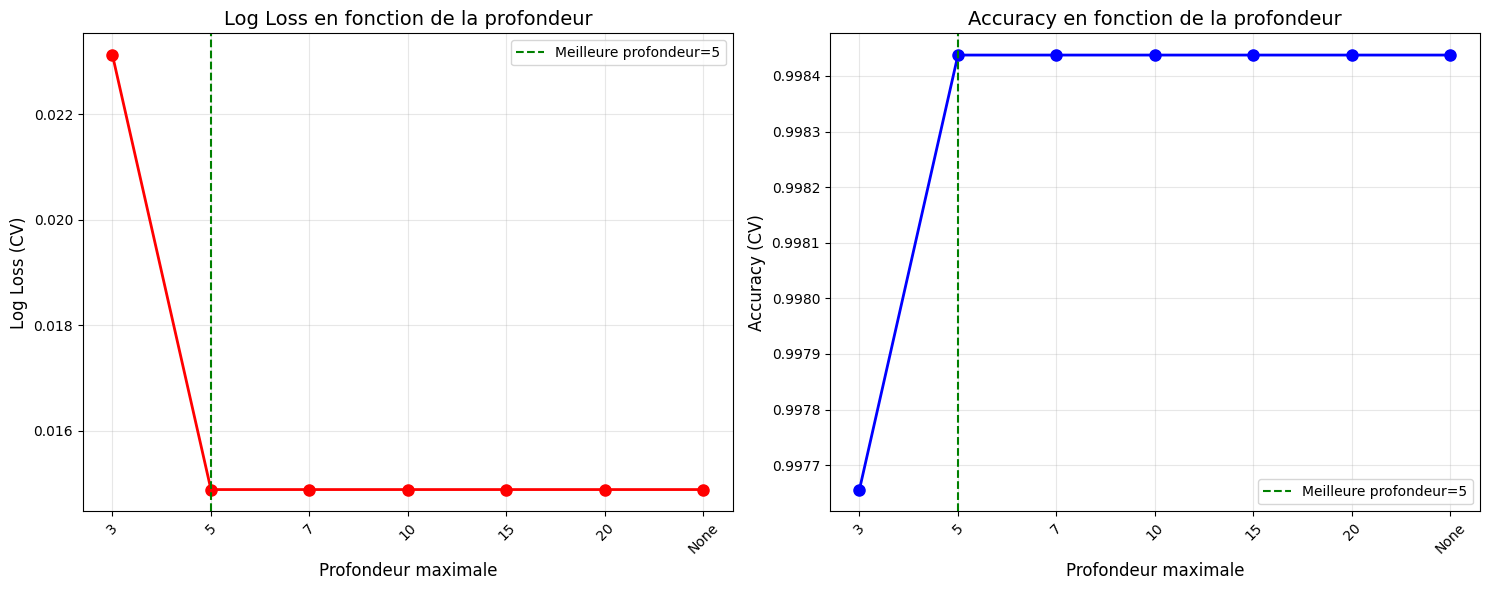

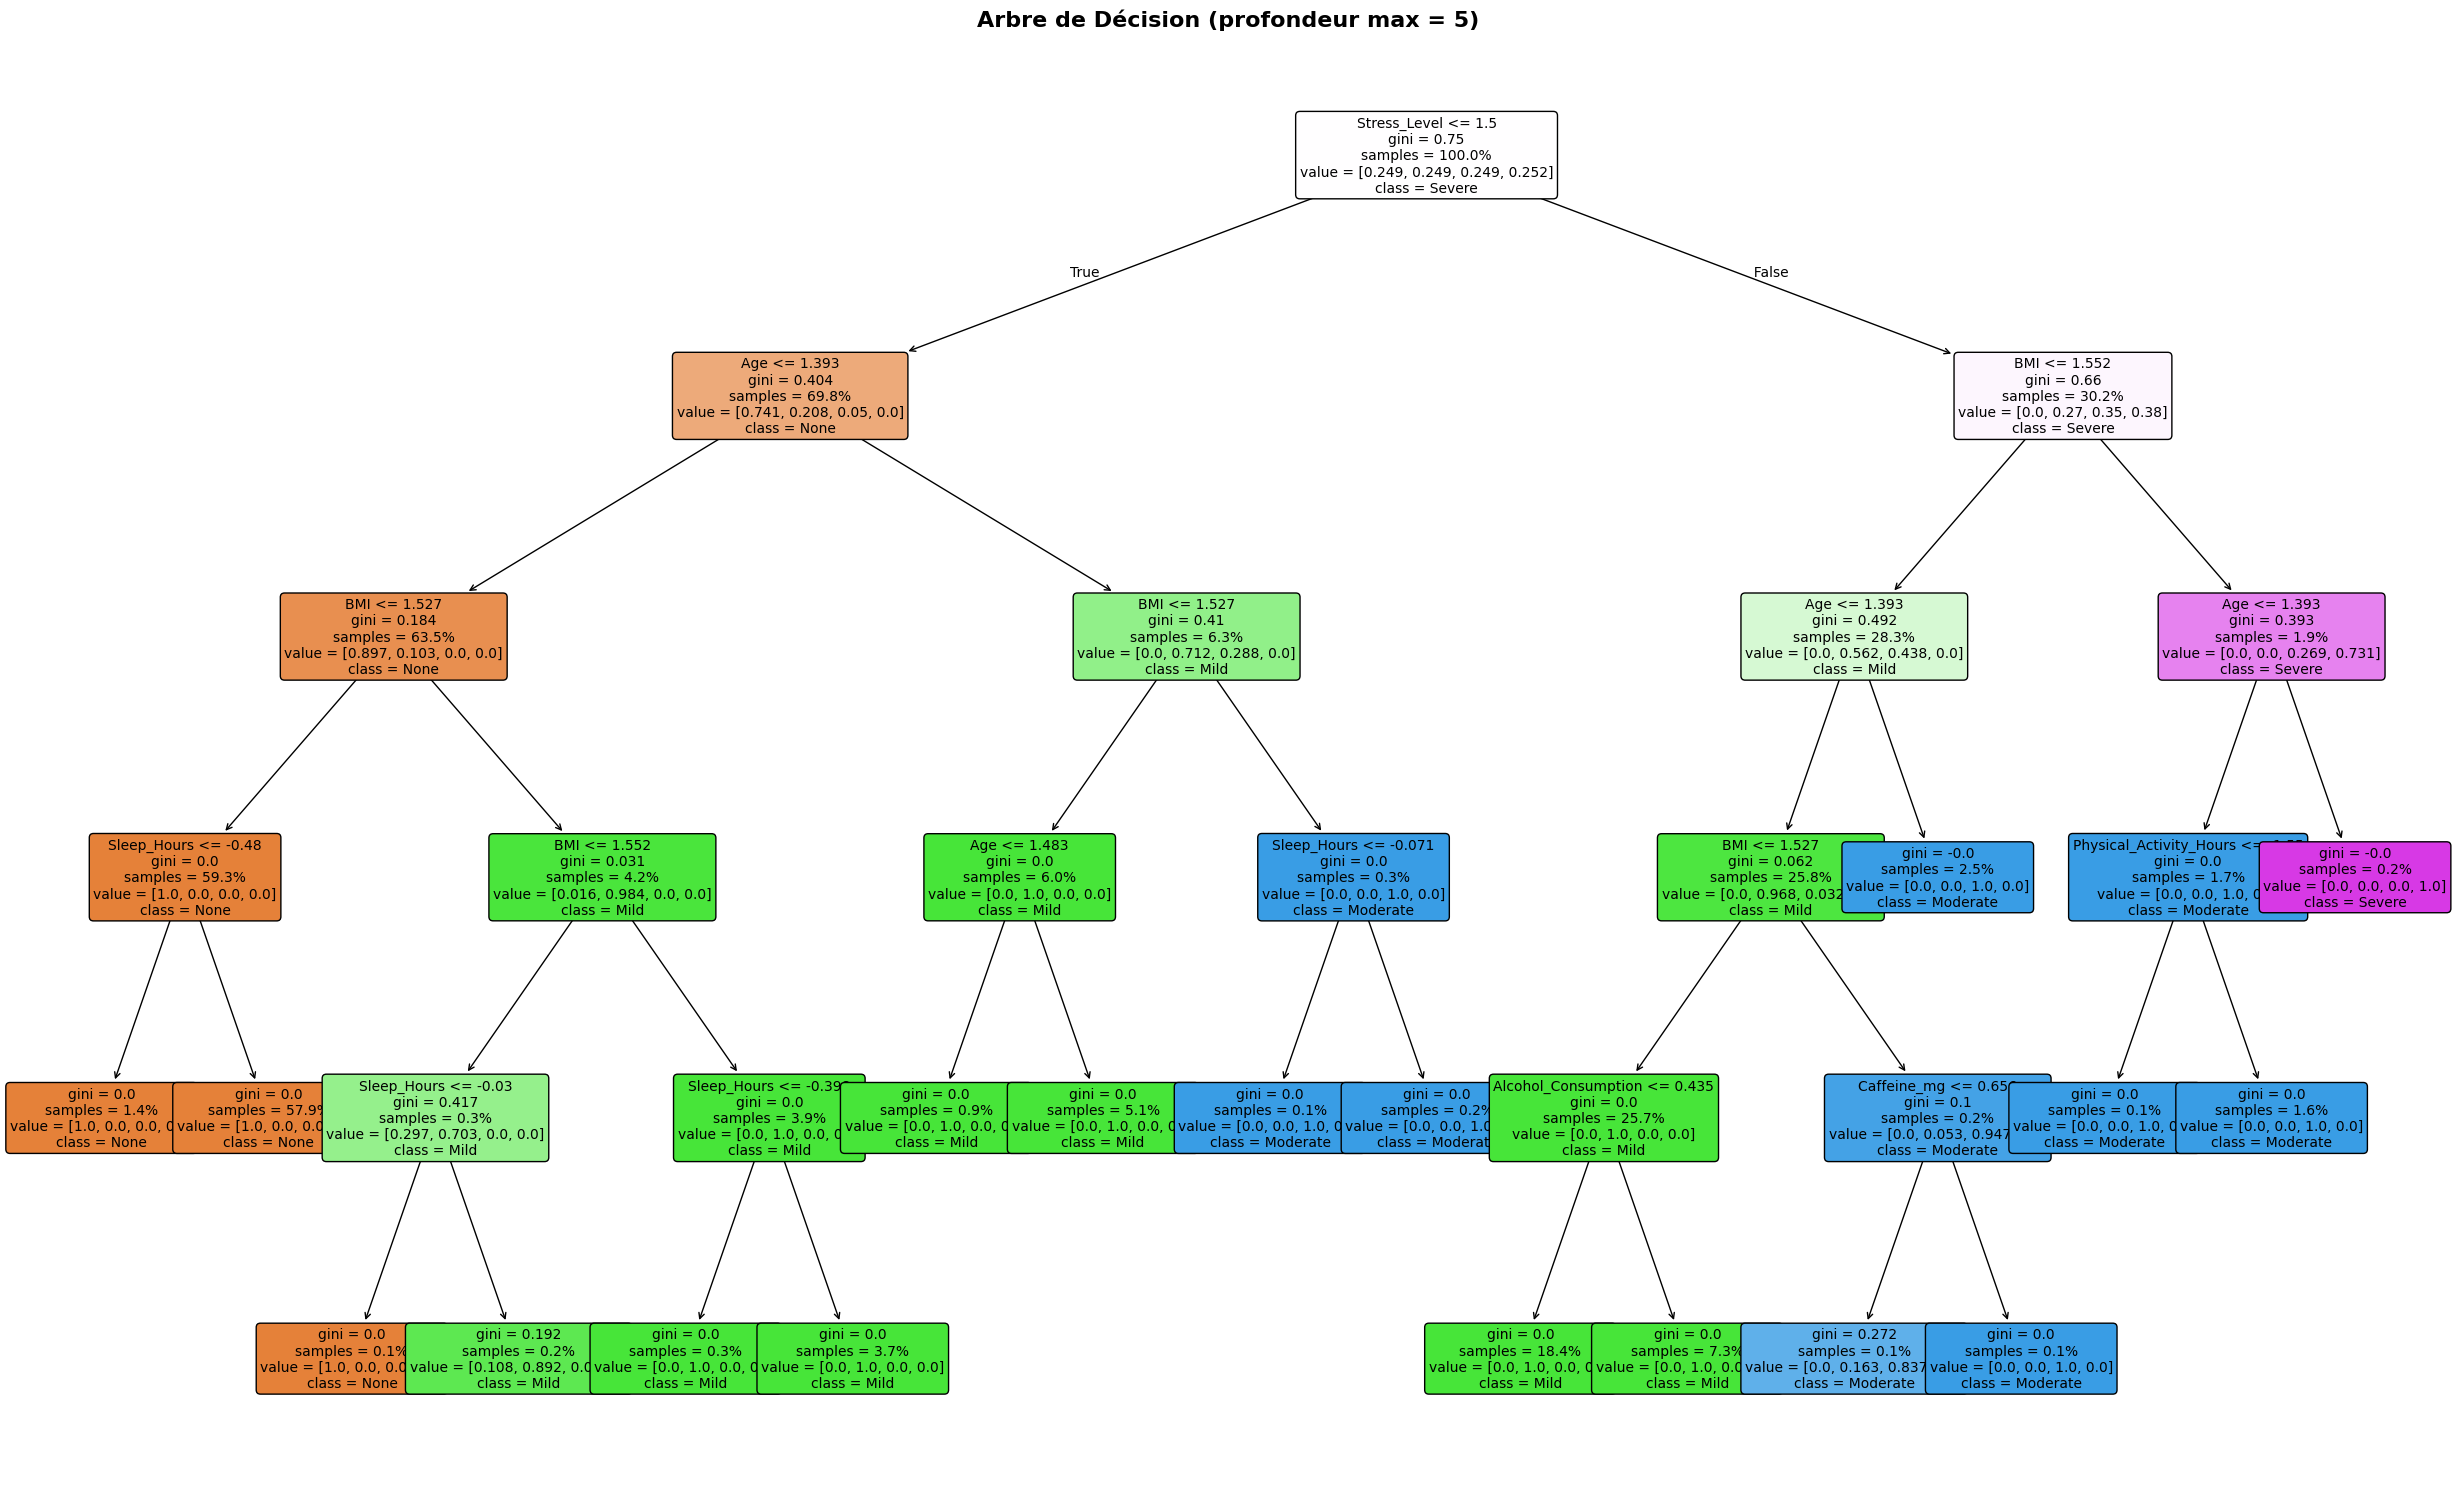

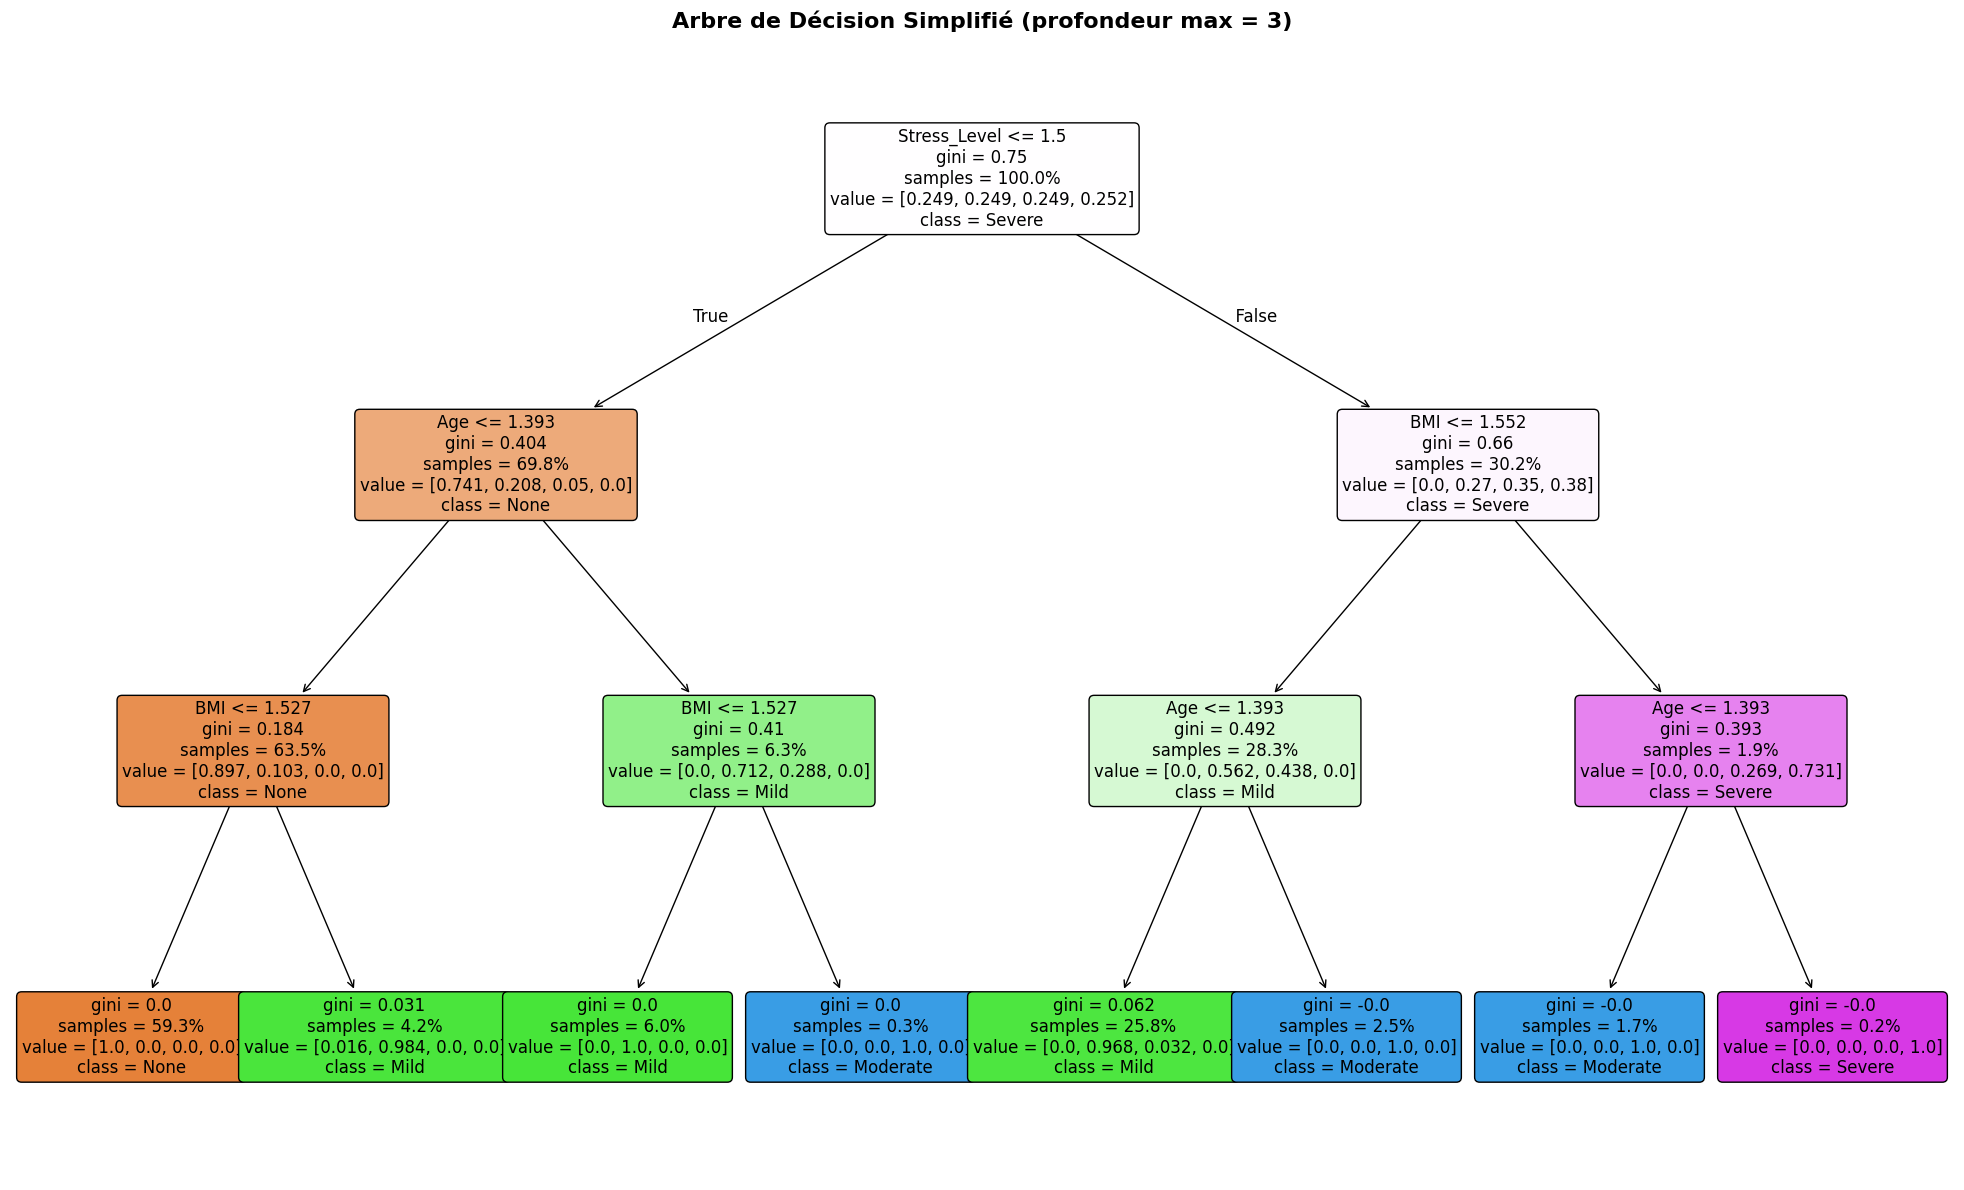

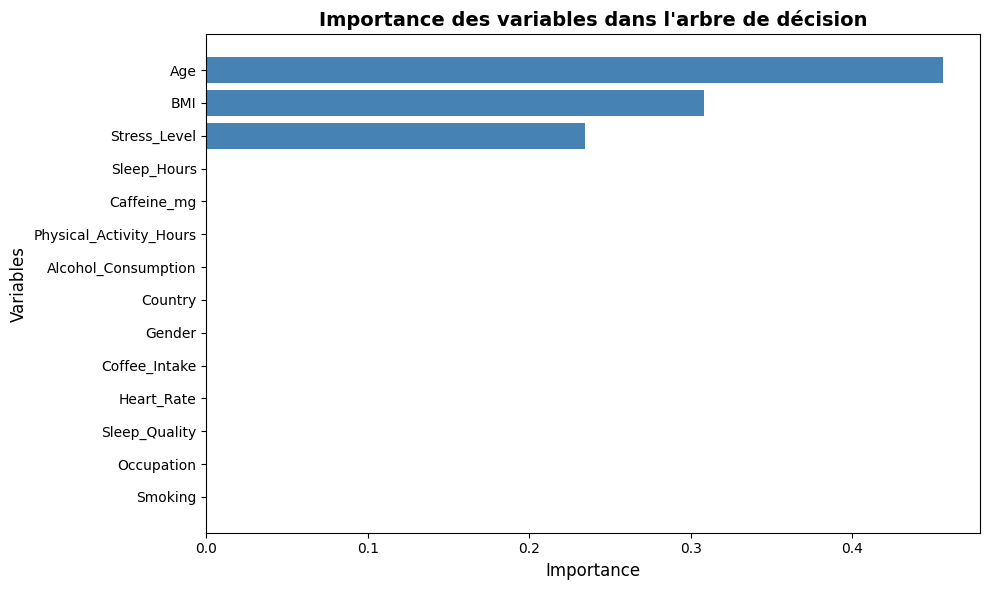


Top 5 des variables les plus importantes:
        Feature  Importance
0           Age    0.456282
7           BMI    0.308364
9  Stress_Level    0.234709
5   Sleep_Hours    0.000550
4   Caffeine_mg    0.000096


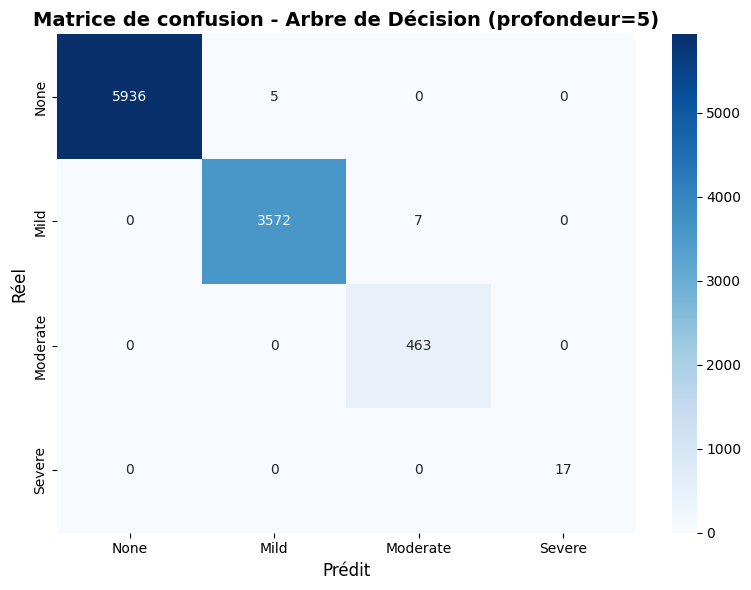


Images sauvegardées:
- decision_tree_cv_results.png
- decision_tree_full.png
- decision_tree_simple.png
- decision_tree_feature_importance.png
- confusion_decision_tree.png


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

print("=== Arbre de Décision ===\n")

# Paramètres à tester pour la profondeur maximale
max_depths = [3, 5, 7, 10, 15, 20, None]
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Stocker les résultats de la validation croisée
dt_results = []

print("Validation croisée pour différentes profondeurs d'arbre")
print("-" * 60)

for max_depth in max_depths:
    fold_losses = []
    fold_accuracies = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Créer et entraîner l'arbre de décision
        dt = DecisionTreeClassifier(
            max_depth=max_depth,
            class_weight=class_weight_dict,
            random_state=42,
            min_samples_split=10,
            min_samples_leaf=5
        )
        dt.fit(X_tr, y_tr)
        
        # Prédictions
        y_val_proba = dt.predict_proba(X_val)
        y_val_pred = dt.predict(X_val)
        
        fold_losses.append(log_loss(y_val, y_val_proba))
        fold_accuracies.append(accuracy_score(y_val, y_val_pred))
    
    mean_loss = float(np.mean(fold_losses))
    std_loss = float(np.std(fold_losses))
    mean_acc = float(np.mean(fold_accuracies))
    std_acc = float(np.std(fold_accuracies))
    
    dt_results.append({
        'max_depth': max_depth,
        'mean_log_loss': mean_loss,
        'std_log_loss': std_loss,
        'mean_accuracy': mean_acc,
        'std_accuracy': std_acc
    })
    
    depth_str = str(max_depth) if max_depth is not None else "None"
    print(f"Profondeur={depth_str:4s} | Log Loss: {mean_loss:.4f} ± {std_loss:.4f} | Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")

# Choisir la meilleure profondeur
best_dt = min(dt_results, key=lambda r: r['mean_log_loss'])
best_depth = best_dt['max_depth']

print(f"\n{'='*60}")
print(f"Meilleure profondeur selon CV: {best_depth}")
print(f"Log Loss: {best_dt['mean_log_loss']:.4f} ± {best_dt['std_log_loss']:.4f}")
print(f"Accuracy: {best_dt['mean_accuracy']:.4f} ± {best_dt['std_accuracy']:.4f}")
print(f"{'='*60}")

# Entraîner le modèle final avec la meilleure profondeur
dt_final = DecisionTreeClassifier(
    max_depth=best_depth,
    class_weight=class_weight_dict,
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=5
)
dt_final.fit(X_tr, y_tr)

# Évaluation sur l'ensemble de test
y_test_proba_dt = dt_final.predict_proba(X_test)
y_test_pred_dt = dt_final.predict(X_test)
test_logloss_dt = log_loss(y_test, y_test_proba_dt)

print(f"\n=== Résultats sur l'ensemble de test ===")
print(f"Decision Tree (profondeur={best_depth})")
print(f"Log Loss: {test_logloss_dt:.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_test_pred_dt))


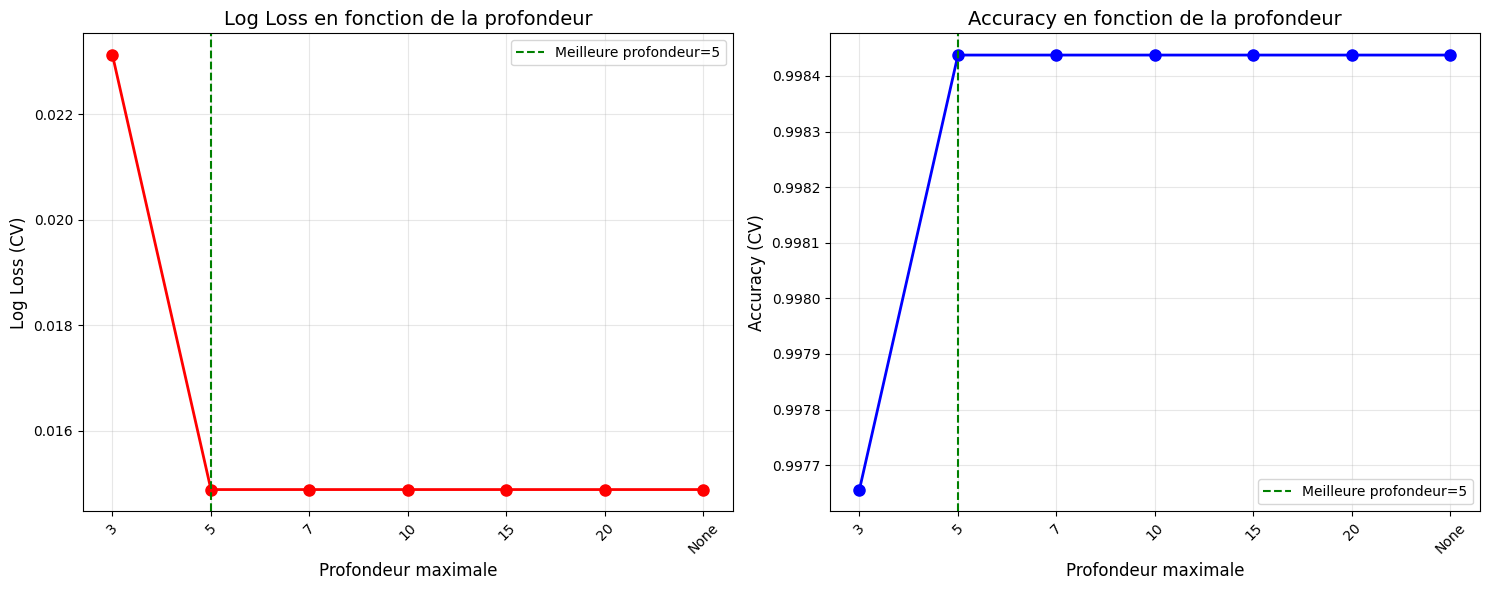

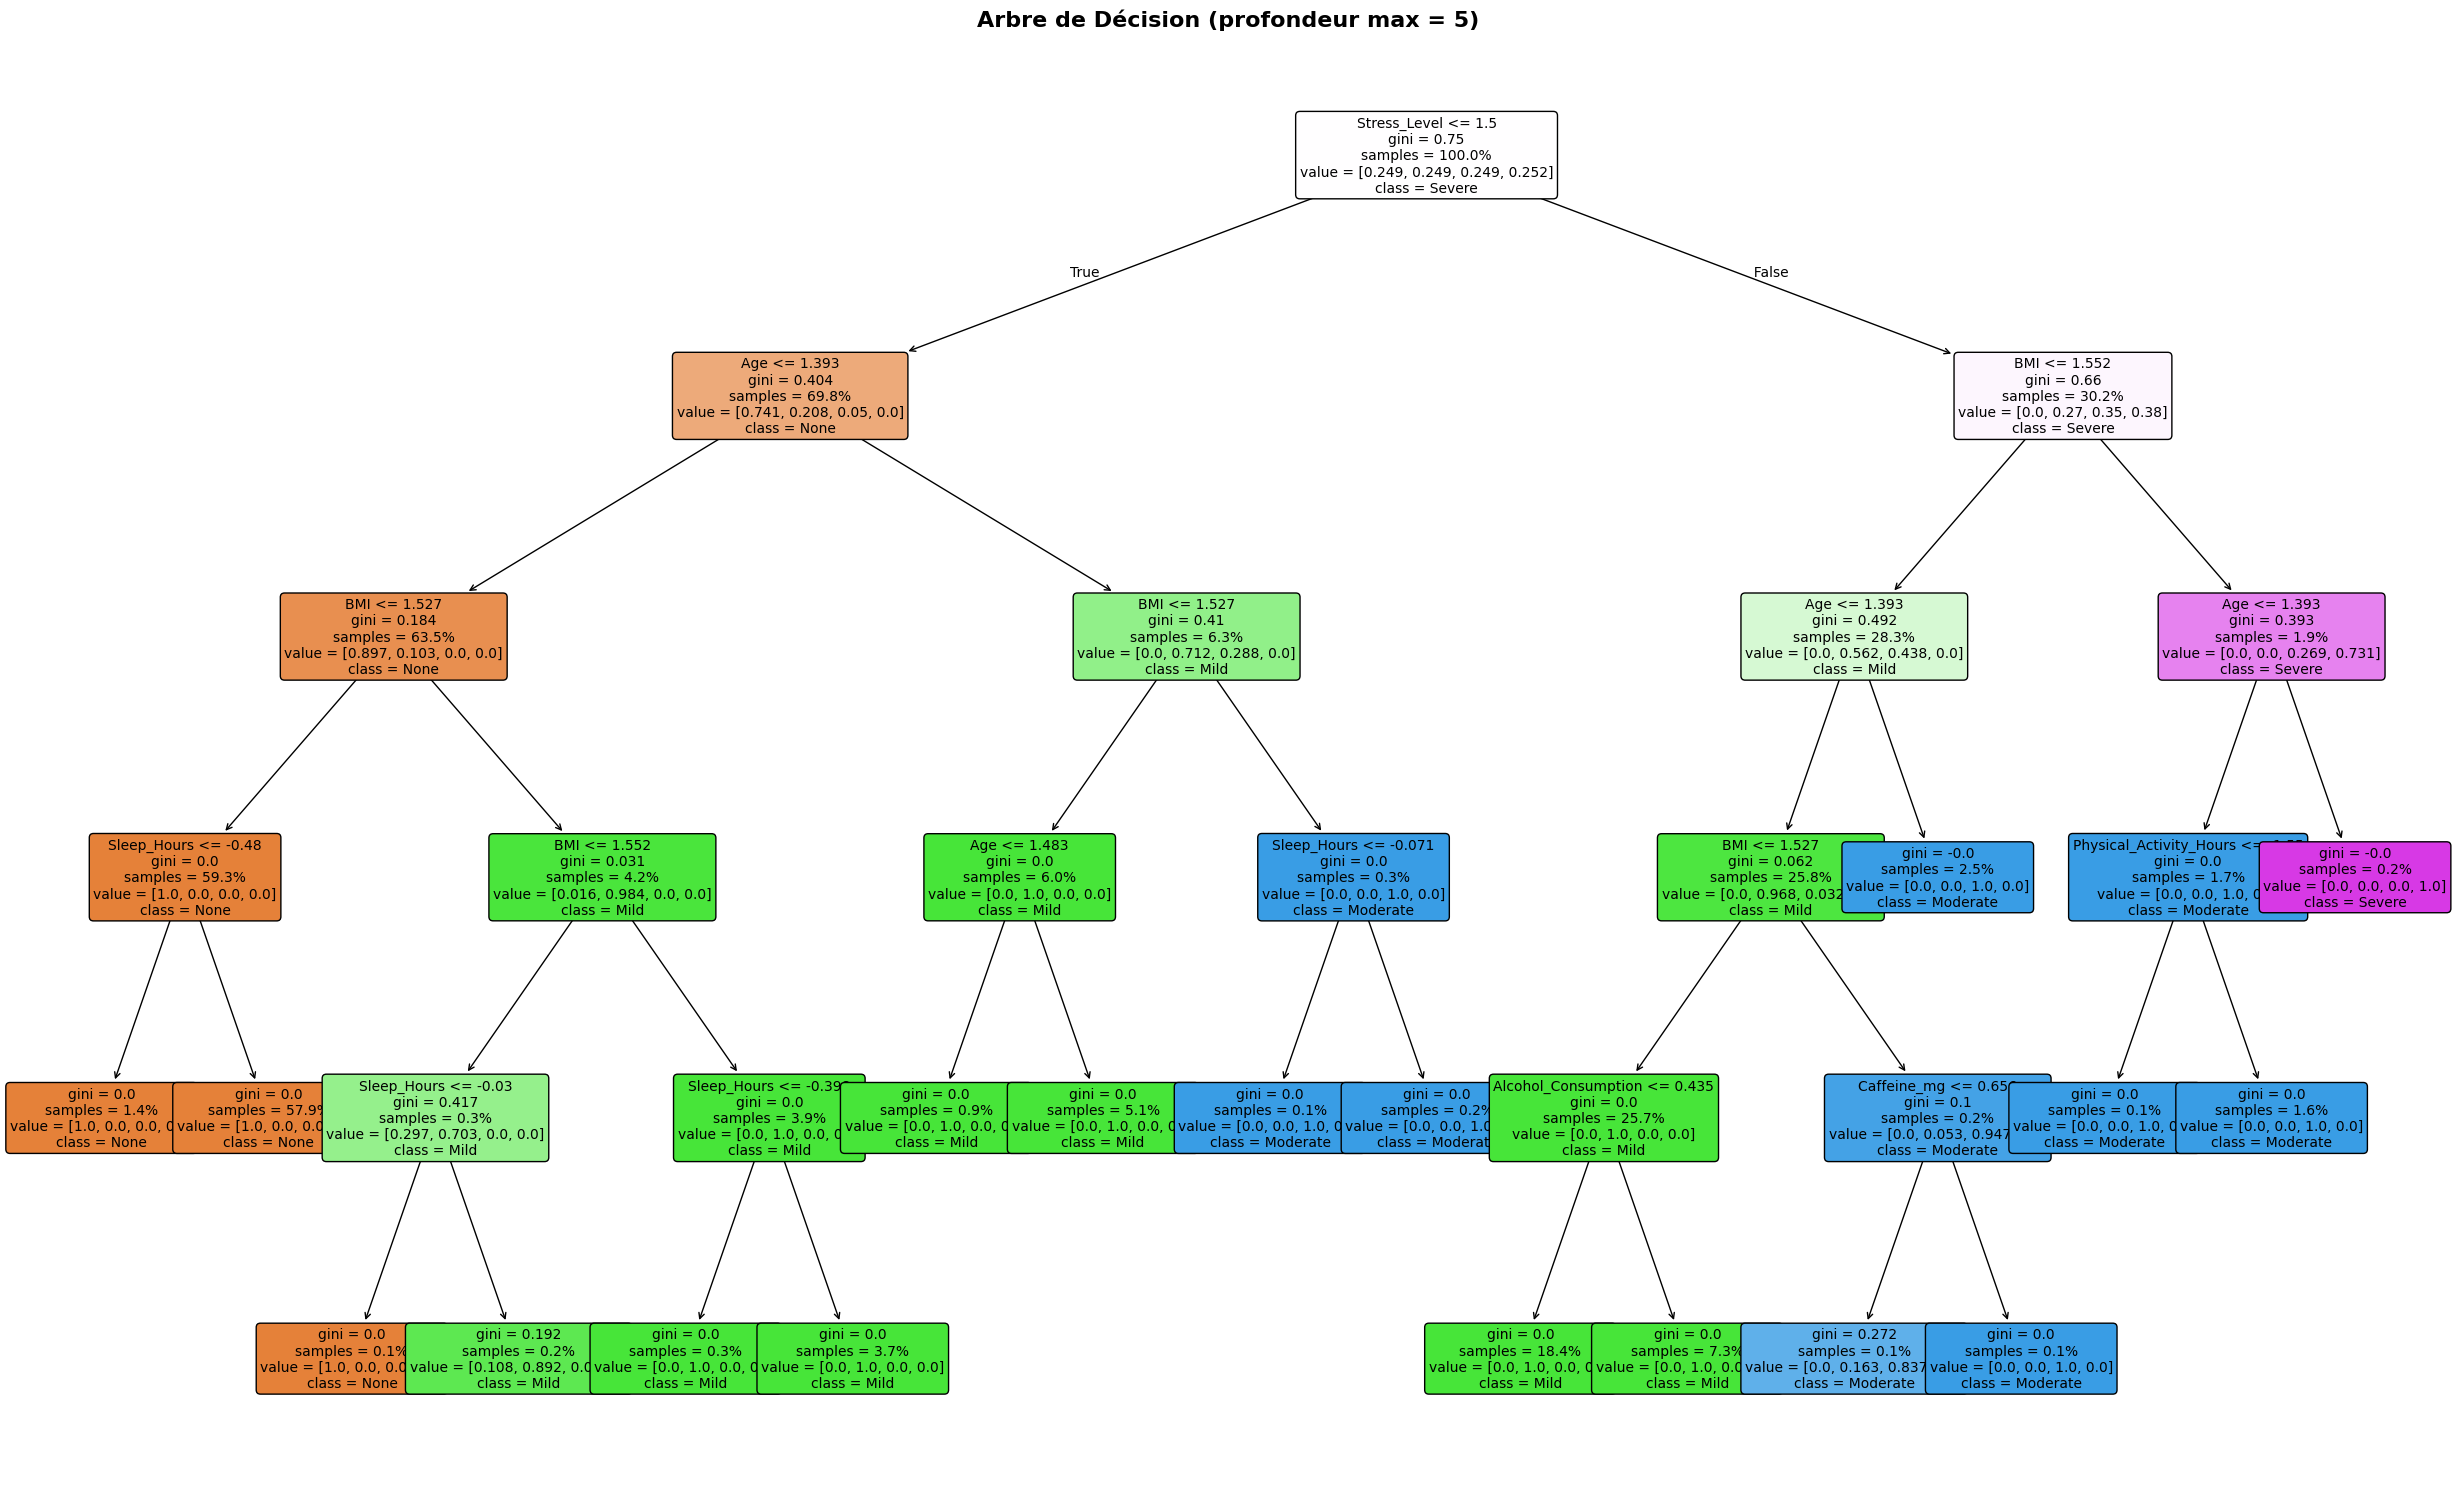

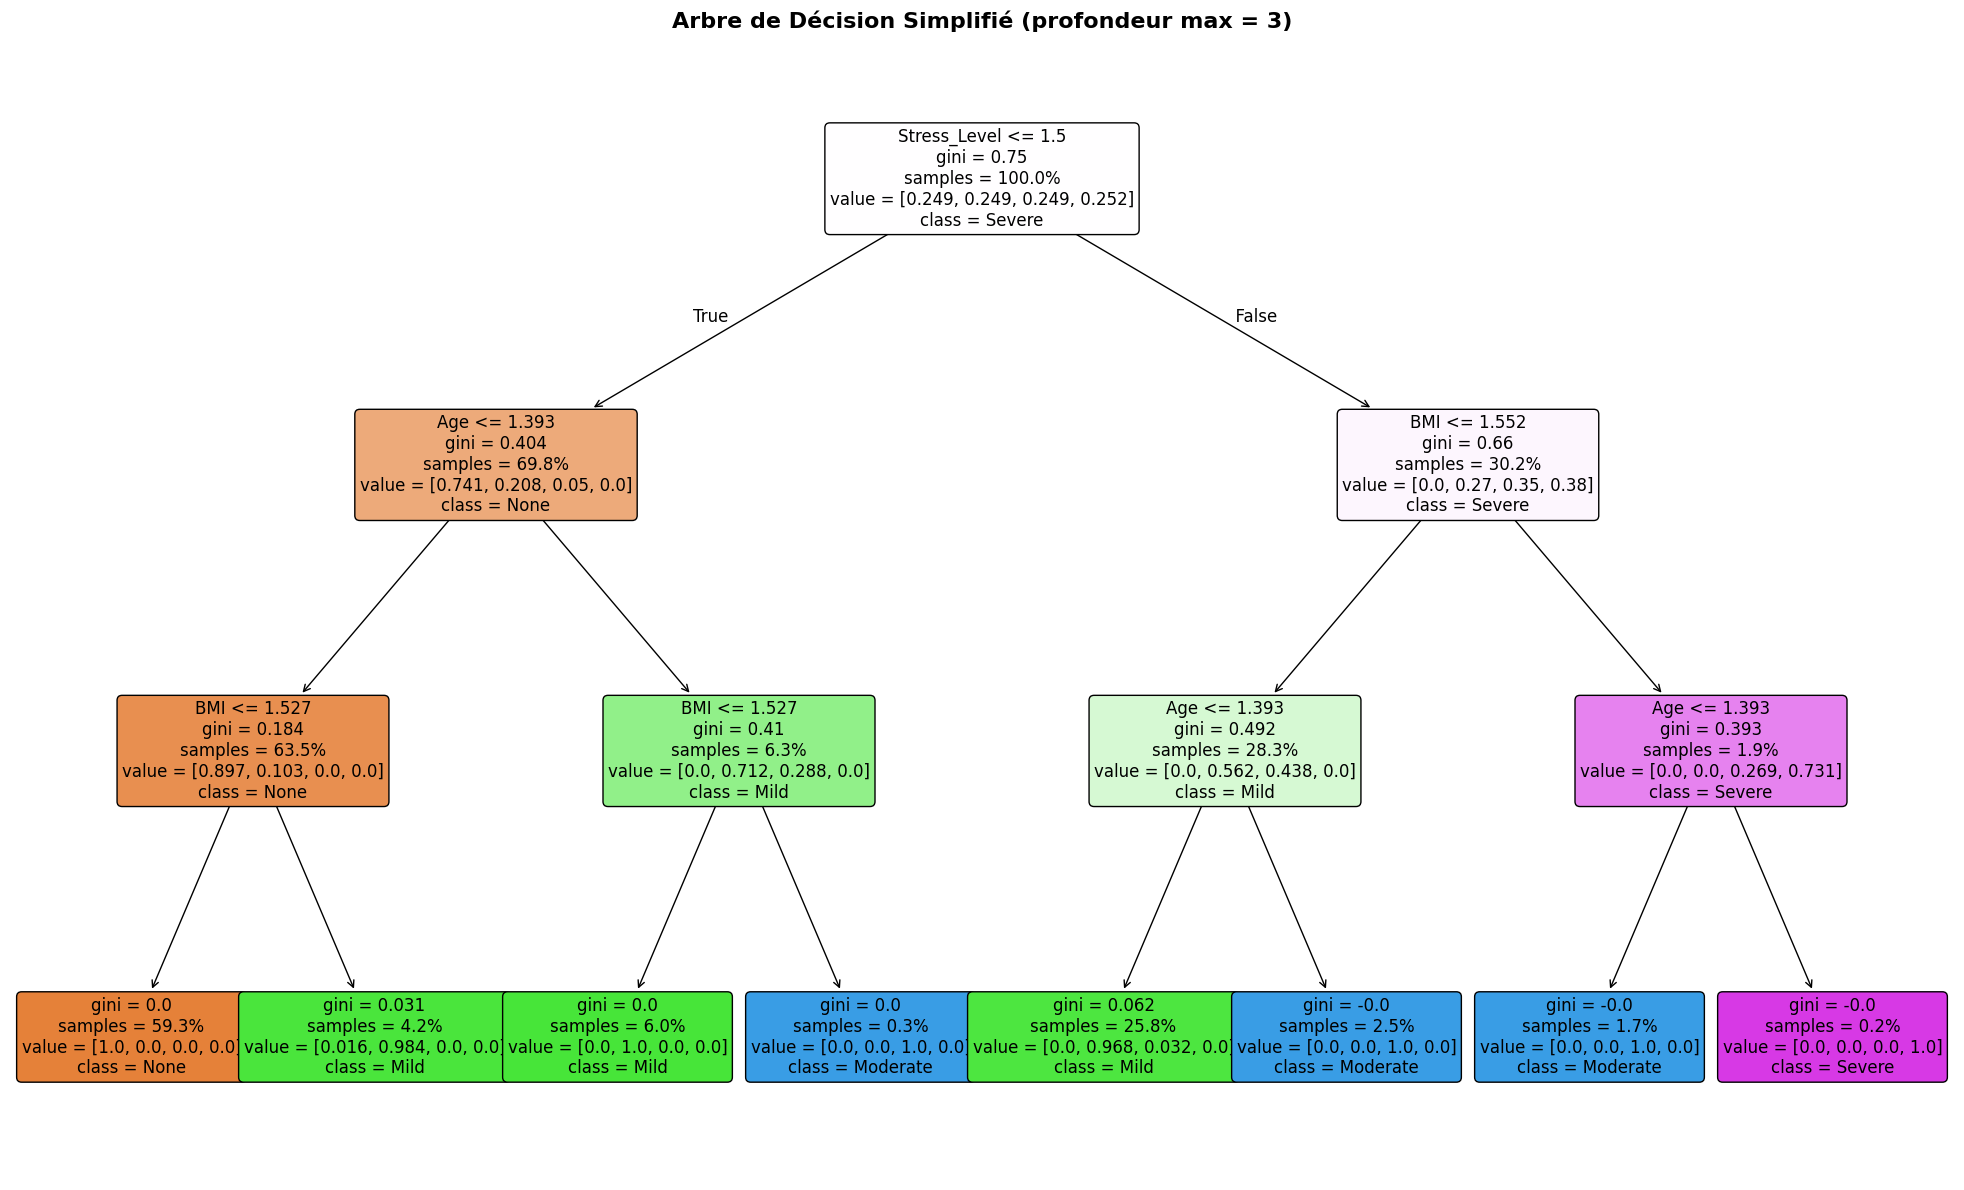

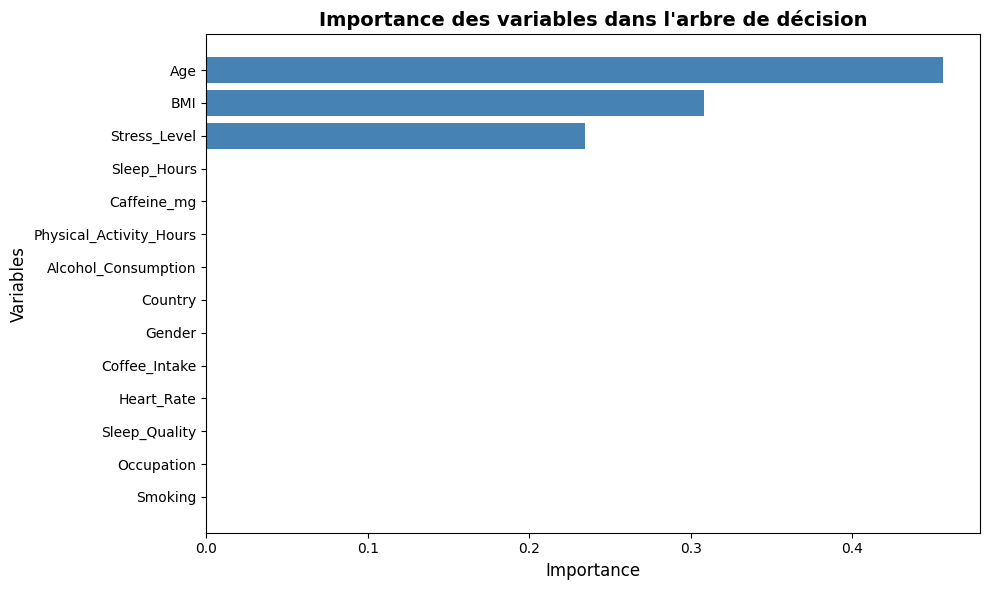


Top 5 des variables les plus importantes:
        Feature  Importance
0           Age    0.456282
7           BMI    0.308364
9  Stress_Level    0.234709
5   Sleep_Hours    0.000550
4   Caffeine_mg    0.000096


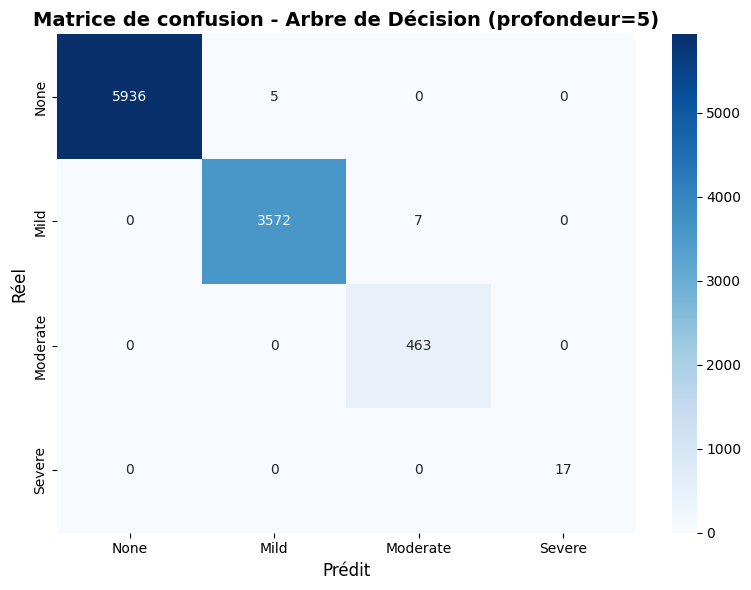

In [18]:
# Visualisation 1: Performance en fonction de la profondeur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

depths = [str(r['max_depth']) if r['max_depth'] is not None else 'None' for r in dt_results]
losses = [r['mean_log_loss'] for r in dt_results]
accs = [r['mean_accuracy'] for r in dt_results]

# Graphique Log Loss vs profondeur
ax1.plot(range(len(depths)), losses, 'o-', linewidth=2, markersize=8, color='red')
best_idx = next(i for i, r in enumerate(dt_results) if r['max_depth'] == best_depth)
ax1.axvline(x=best_idx, color='green', linestyle='--', label=f'Meilleure profondeur={best_depth}')
ax1.set_xticks(range(len(depths)))
ax1.set_xticklabels(depths, rotation=45)
ax1.set_xlabel('Profondeur maximale', fontsize=12)
ax1.set_ylabel('Log Loss (CV)', fontsize=12)
ax1.set_title('Log Loss en fonction de la profondeur', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Graphique Accuracy vs profondeur
ax2.plot(range(len(depths)), accs, 'o-', linewidth=2, markersize=8, color='blue')
ax2.axvline(x=best_idx, color='green', linestyle='--', label=f'Meilleure profondeur={best_depth}')
ax2.set_xticks(range(len(depths)))
ax2.set_xticklabels(depths, rotation=45)
ax2.set_xlabel('Profondeur maximale', fontsize=12)
ax2.set_ylabel('Accuracy (CV)', fontsize=12)
ax2.set_title('Accuracy en fonction de la profondeur', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig('decision_tree_cv_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualisation 2: Affichage de l'arbre de décision
plt.figure(figsize=(25, 15))
plot_tree(
    dt_final,
    feature_names=X_train.columns,
    class_names=['None', 'Mild', 'Moderate', 'Severe'],
    filled=True,
    rounded=True,
    fontsize=10,
    proportion=True
)
plt.title(f'Arbre de Décision (profondeur max = {best_depth})', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('decision_tree_full.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualisation 3: Arbre simplifié (profondeur 3 pour la lisibilité)
dt_simple = DecisionTreeClassifier(
    max_depth=3,
    class_weight=class_weight_dict,
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=5
)
dt_simple.fit(X_train, y_train)

plt.figure(figsize=(20, 12))
plot_tree(
    dt_simple,
    feature_names=X_train.columns,
    class_names=['None', 'Mild', 'Moderate', 'Severe'],
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=True
)
plt.title('Arbre de Décision Simplifié (profondeur max = 3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('decision_tree_simple.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualisation 4: Importance des features
feature_importance = dt_final.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='steelblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.title('Importance des variables dans l\'arbre de décision', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('decision_tree_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 des variables les plus importantes:")
print(features_df.head())

# Matrice de confusion
y_pred = dt_final.predict(X)
cm_dt = confusion_matrix(y, y_pred, labels=dt_final.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['None', 'Mild', 'Moderate', 'Severe'],
            yticklabels=['None', 'Mild', 'Moderate', 'Severe'])
plt.xlabel('Prédit', fontsize=12)
plt.ylabel('Réel', fontsize=12)
plt.title(f'Matrice de confusion - Arbre de Décision (profondeur={best_depth})', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()